In [41]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Prepare paths
main_path = '../data/'
squat_path = os.path.join(main_path, 'raw/squat')
personal_data_path = os.path.join(main_path, 'PersonalData.xlsx')

In [3]:
# Read personal data from excel
personal_data = pd.read_excel(personal_data_path, dtype={'Id': str})

In [4]:
# Prepare dataframe for squats
squat_data = pd.DataFrame(
    columns=['FileId', 'Id', 'CameraPosition', 'SetNumber', 'Repetitions', 'RepNumber', 'Load', 'Lifted'],
)

for file in os.listdir(squat_path):
    filename = os.path.splitext(file)[0]
    # Extract features from file name
    features = filename.split('_')

    Id = features[0]
    camera_position = features[-1]

    set_number, repetitions, rep_number, load, lifted = list(
        map(int, features[1: -1]))
    
    # Collecting data into dataframe
    squat_data.loc[len(squat_data)] = [
        filename,
        Id,
        camera_position,
        set_number,
        repetitions,
        rep_number,
        load,
        lifted
    ]

In [5]:
# Merge personal data and squat data
data = pd.merge(personal_data, squat_data, on='Id')

In [6]:
# Calculate the maximum load that was passed
max_load = data.loc[data['Lifted'] == 1, ['Id', 'Load']].groupby(by='Id', as_index=False).max()
max_load = max_load.rename(columns={'Load': 'MaxLoad'})
data = pd.merge(data, max_load, on='Id')

# Calculate what percentage of the maximum load is the current load
data['PercentageMaxLoad'] = data['Load'] / data['MaxLoad']
del data['MaxLoad']

In [ ]:
# Save file as excel
# data.to_excel('Personal&SquatData.xlsx')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1322 entries, 0 to 1321
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     1322 non-null   object 
 1   Sex                    1322 non-null   int64  
 2   Age                    1322 non-null   int64  
 3   Height                 1322 non-null   int64  
 4   Weight                 1322 non-null   int64  
 5   ProficiencyLevel       1322 non-null   object 
 6   TrainingExperience     1322 non-null   float64
 7   EquipmentAvailability  1322 non-null   object 
 8   TrainingProgram        1322 non-null   object 
 9   TrainingFrequency      1322 non-null   int64  
 10  PastInjuries           1322 non-null   object 
 11  LastInjury             1322 non-null   object 
 12  PainDuringTraining     1322 non-null   object 
 13  Participant            1322 non-null   int64  
 14  SquatRecord            1322 non-null   float64
 15  Benc

In [9]:
# How many squat sets were recorded?
len(data.drop_duplicates(subset=['Id', 'SetNumber']))

151

In [10]:
# How many repetitions were recorded?
len(data.drop_duplicates(subset=['Id', 'SetNumber', 'RepNumber']))

468

In [11]:
# How many squats were recorded from different camera position
tmp = data.groupby(by=['Id', 'SetNumber', 'RepNumber']).count()
len(tmp.loc[tmp['CameraPosition'] == 3])

385

In [11]:
# Ile serii przysiadów średnio przypada na osobę?
# How many sets of squats did average person?
data[['Id', 'SetNumber']].groupby(by='Id')['SetNumber'].max().mean()

np.float64(10.2)

In [12]:
# Ile średnio przysiadów przypada na osobę?
# How many squats did average person?
data.drop_duplicates(subset=['Id', 'SetNumber']).groupby(by='Id')['Repetitions'].sum().mean()

np.float64(31.533333333333335)

Passed squats: 443
Not passed squats: 25


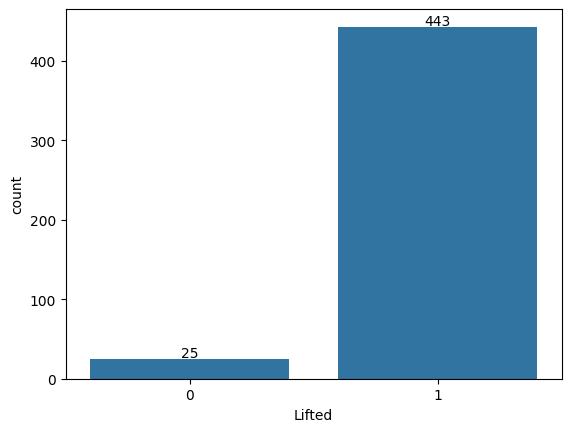

In [14]:
# How many squats were passed, and how many weren't?
print(f"Passed squats: {len(data.loc[data['Lifted'] == 1].drop_duplicates(subset=['Id', 'SetNumber', 'RepNumber']))}")
print(f"Not passed squats: {len(data.loc[data['Lifted'] == 0].drop_duplicates(subset=['Id', 'SetNumber', 'RepNumber']))}")

unique_data = data.drop_duplicates(subset=['Id', 'SetNumber', 'RepNumber'])

ax = sns.countplot(data=unique_data, x='Lifted')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height() - 10), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

plt.show()

In [15]:
# Ile zaliczonych, a ile niezaliczonych przysiadów średnio przypada na jedną osobę?


In [15]:
# Ile jest kobiet i ilu mężczyzn oraz jakie są ich proporcje?
# How many women and how many men were recorded?
print(f"Women: {data.loc[data['Sex'] == 0, 'Id'].nunique()}")
print(f"Men: {data.loc[data['Sex'] == 1, 'Id'].nunique()}")

Women: 4
Men: 11


In [17]:
# Ile przysiadów średnio przypadło na kobietę, a ile na mężczyznę?
print(data.loc[data['Sex'] == 0].drop_duplicates(subset=['Id', 'SetNumber']).groupby(by=['Id'])['Repetitions'].sum().mean())

print(data.loc[data['Sex'] == 1].drop_duplicates(subset=['Id', 'SetNumber']).groupby(by=['Id'])['Repetitions'].sum().mean())

31.75
31.545454545454547


In [18]:
# Ile zaliczonych, a ile niezaliczonych przysiadów średnio przypada na kobietę, a ile na mężczyznę?


In [18]:
# Jaki jest średni wiek nagranych osób?
data.drop_duplicates(subset='Id')['Age'].mean()

31.0

In [19]:
# Jaki jest średni wiek wśród kobiet, a jaki wśród mężczyzn?
# Jak doświadczenie rozkłada się na kobiety, a jak na mężczyzn?
print(f"Women: {data.loc[data['Sex'] == 0].drop_duplicates(subset='Id')['Age'].mean()}")
print(f"Men: {data.loc[data['Sex'] == 1].drop_duplicates(subset='Id')['Age'].mean()}")

Women: 31.0
Men: 31.0


In [20]:
# Jakie jest średnie doświadczenie ochotników, w latach?
data.drop_duplicates(subset='Id')['TrainingExperience'].mean()

3.1666666666666665

In [21]:
# Jak doświadczenie rozkłada się na kobiety, a jak na mężczyzn?
print(f"Women: {data.loc[data['Sex'] == 0].drop_duplicates(subset='Id')['TrainingExperience'].mean()}")
print(f"Men: {data.loc[data['Sex'] == 1].drop_duplicates(subset='Id')['TrainingExperience'].mean()}")

Women: 5.0
Men: 2.5


In [22]:
# Jaka jest średnia częstotliwość treningu na siłowni?
data.drop_duplicates(subset='Id')['TrainingFrequency'].mean()

3.8666666666666667

In [23]:
# Jaka jest średnia częstotliwość treningu na siłowni dla kobiet, a jaka dla mężczyzn?
print(f"Women: {data.loc[data['Sex'] == 0].drop_duplicates(subset='Id')['TrainingFrequency'].mean()}")

print(f"Men: {data.loc[data['Sex'] == 1].drop_duplicates(subset='Id')['TrainingFrequency'].mean()}")

Women: 5.25
Men: 3.3636363636363638


In [24]:
# Jaka jest korelacja pomiędzy doświadczeniem, a częstotliwością treningową?
# Czy staż treningowy wpływa na częstotliwość wykonywanych treningów?
data.drop_duplicates(subset=['Id'])[['TrainingExperience', 'TrainingFrequency']].corr()

,TrainingExperience,TrainingFrequency
TrainingExperience,1.00000,0.59377
TrainingFrequency,0.59377,1.00000


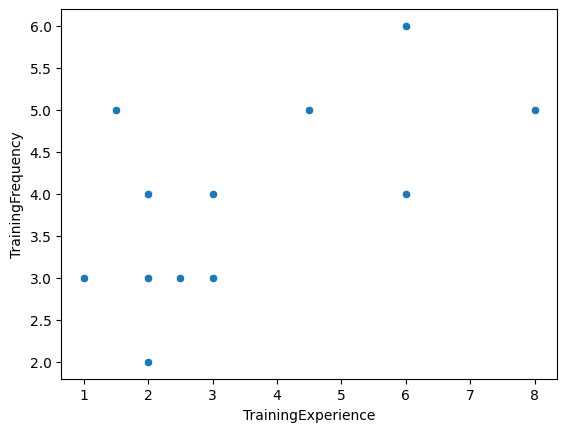

In [25]:
data.drop_duplicates(subset=['Id'])[['TrainingExperience', 'TrainingFrequency']]
sns.scatterplot(data=data.drop_duplicates(subset=['Id']), x='TrainingExperience', y='TrainingFrequency');

In [26]:
# Jaka część ochotników uprawia dodatkowo inne sporty?
print(f"Other sports: {len(data.loc[data['PhysicalActivities'] != 'none'].drop_duplicates(subset='Id'))}")

print(f"Gym only: {len(data.loc[data['PhysicalActivities'] == 'none'].drop_duplicates(subset='Id'))}")

Other sports: 10
Gym only: 5


In [27]:
# del data['LiftingAccuracy']

# Jaka jest relacja pomiędzy płcią, wiekiem, doświadczeniem, częstotliwością a dokładnością przysiadu?
tmp = data.loc[(data['Repetitions'] == 1) & (data['PercentageMaxLoad'] > 0.8)].groupby(by='Id')['Lifted'].mean().reset_index()
tmp = tmp.rename(columns={'Lifted': 'LiftingAccuracy'})
data = pd.merge(data, tmp, on='Id')

In [28]:
columns = ['Sex', 'Age', 'TrainingExperience', 'TrainingFrequency', 'LiftingAccuracy']
data.drop_duplicates(subset=['Id'])[columns].corr().style.background_gradient(cmap='coolwarm')

,Sex,Age,TrainingExperience,TrainingFrequency,LiftingAccuracy
Sex,1.000000,0.000000,-0.565480,-0.814509,0.457904
Age,0.000000,1.000000,0.287881,-0.098134,0.287050
TrainingExperience,-0.565480,0.287881,1.000000,0.593770,0.142979
TrainingFrequency,-0.814509,-0.098134,0.593770,1.000000,-0.403921
LiftingAccuracy,0.457904,0.287050,0.142979,-0.403921,1.000000


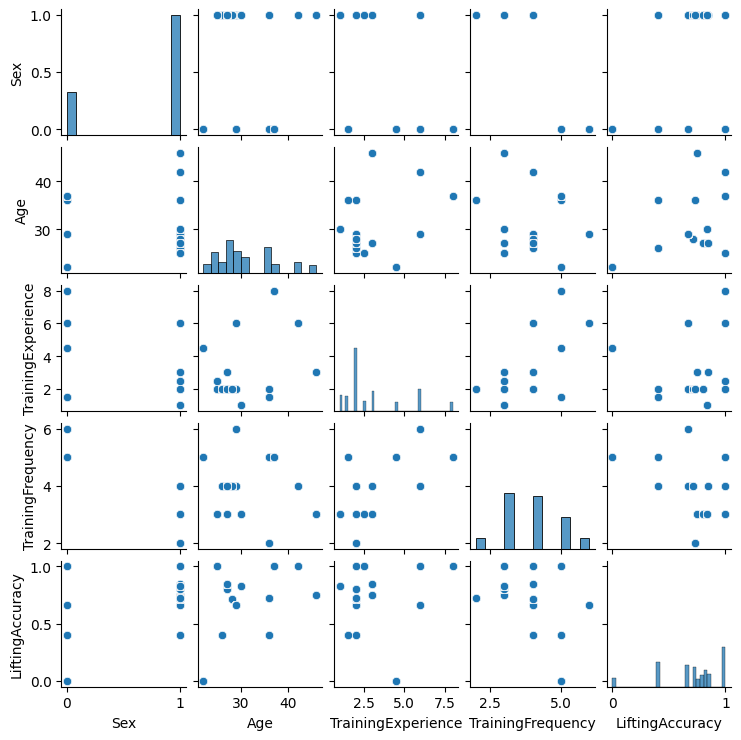

In [29]:
sns.pairplot(data[columns], height=1.5);

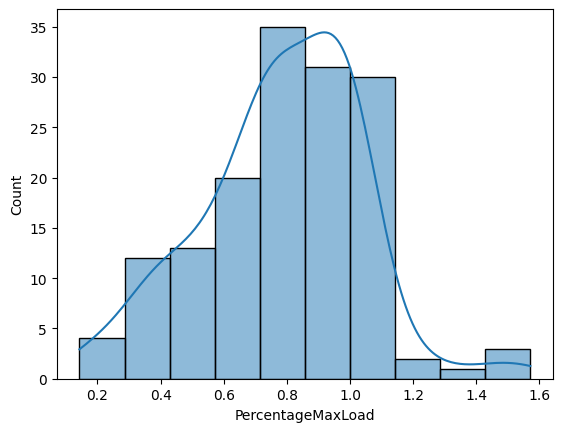

In [30]:
sns.histplot(data=data.drop_duplicates(subset=['Id', 'SetNumber']), x='PercentageMaxLoad', bins=10, kde=True);

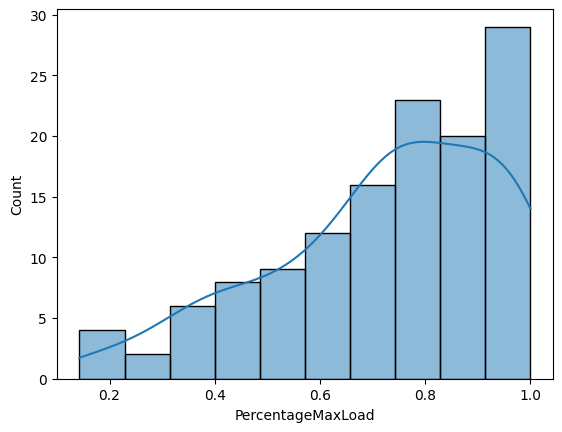

In [31]:
sns.histplot(data=data.loc[data['Lifted'] == 1].drop_duplicates(subset=['Id', 'SetNumber']), x='PercentageMaxLoad', bins=10, kde=True);

In [ ]:
data = pd.read_csv('../data/processed/AllSquats.csv')

In [ ]:
length_of_video_list = np.empty((0, 1))

for file_id, file_data in data.groupby(by="FileId"):
    length_of_video = len(file_data) / 60
    length_of_video_list = np.vstack(
        [length_of_video_list, length_of_video])
    
mean_length_value = np.mean(length_of_video_list)
median_length_value = np.median(length_of_video_list)

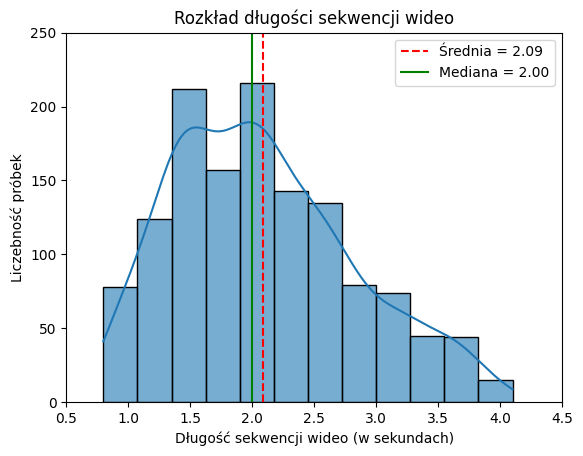

In [ ]:
sns.histplot(length_of_video_list, bins=12, kde=True, color='blue', alpha=0.6);

plt.axvline(mean_length_value, color='red', linestyle='--', label=f'Średnia = {mean_length_value:.2f}');
plt.axvline(median_length_value, color='green', linestyle='-', label=f'Mediana = {median_length_value:.2f}');

plt.xlim((0.5, 4.5))
plt.ylim((0, 250))

plt.title('Rozkład długości sekwencji wideo');
plt.xlabel('Długość sekwencji wideo (w sekundach)');
plt.ylabel('Liczebność próbek');

plt.legend();

plt.show();

In [ ]:
# długość sekwencji wideo a 1RM ?

In [103]:
data = pd.read_csv('../data/processed/OneRepMaxData_250324.csv')

In [146]:
length_of_video_list = np.empty((2,))

for file_id, file_data in data.groupby(by="FileId"):
    length_of_video = len(file_data) / 60
    percentage_max_load = file_data["PercentageMaxLoad"].values[0]

    array = np.array([length_of_video, percentage_max_load])
    length_of_video_list = np.vstack(
        [length_of_video_list, array])

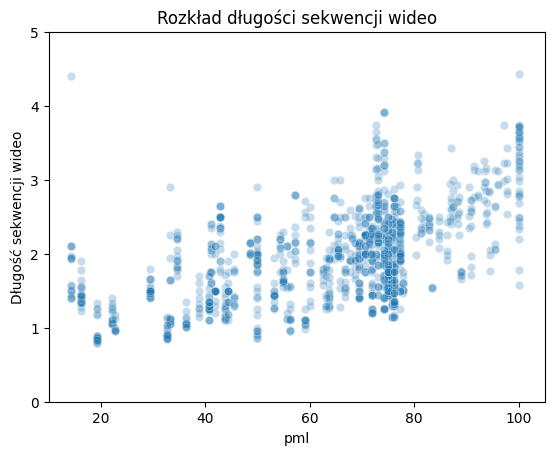

In [ ]:
sns.scatterplot(x=length_of_video_list[:, 1], y=length_of_video_list[:, 0], alpha=0.25)

plt.xlim((10, 105))
plt.ylim((0, 5))

plt.title('Rozkład długości sekwencji wideo');
plt.xlabel('Aktualny procent One-Rep Max');
plt.ylabel('Długość sekwencji wideo');

plt.show();
